In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly



In [2]:
# Load the data
data = pd.read_csv('../Data Source/combined_single_sealevel.csv')



In [3]:
# Preprocess the data
data['ds'] = pd.to_datetime(data['Year'], format='%Y')
data['y'] = data['Total Primary Energy Consumption']

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]



In [4]:
# Train the Prophet model
model = Prophet()
model.fit(train_data)



19:17:05 - cmdstanpy - INFO - Chain [1] start processing
19:17:06 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
# Make predictions for the test set
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)



Mean Squared Error: 104842.72
Predicted energy consumption for the next 30 days:
0      86.941079
1      87.888495
2      89.408877
3      90.297122
4      90.671515
5      91.618931
6      93.139314
7      94.027559
8      94.401952
9      95.349368
10     96.869750
11     97.757995
12     98.132388
13     99.079804
14    100.600187
15    101.488432
16    101.862825
17    102.810241
18    104.330624
19    105.218869
20    105.593262
21    106.540678
22    108.061060
23    108.949305
24    109.323698
25    110.271114
26    111.791497
27    112.679742
28    113.054135
29    114.001551
Name: yhat, dtype: float64


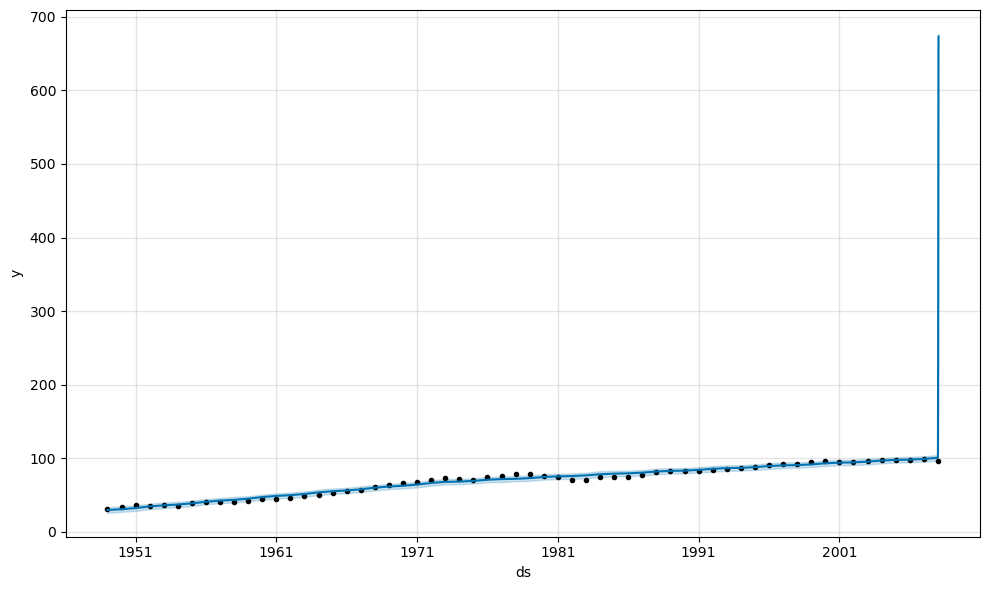

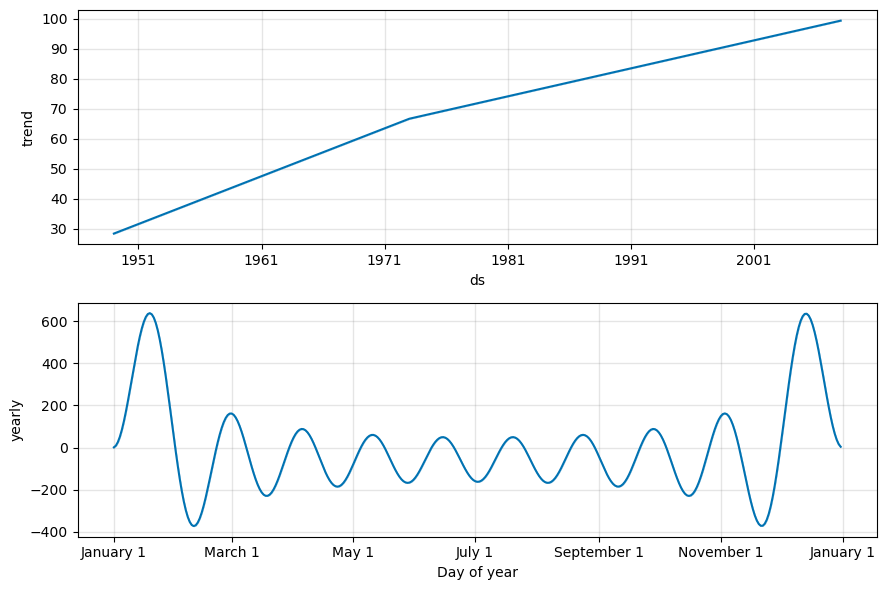

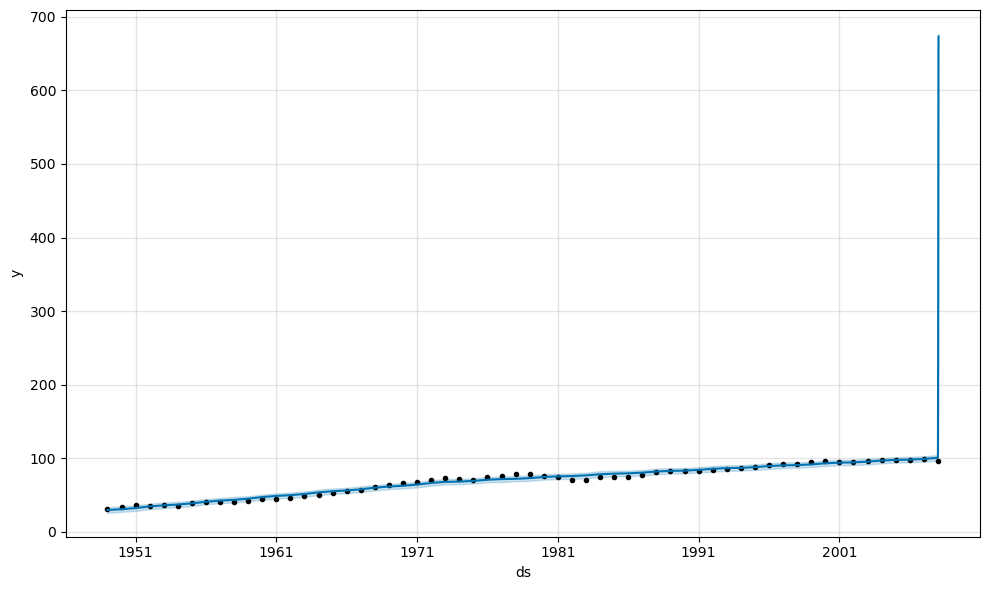

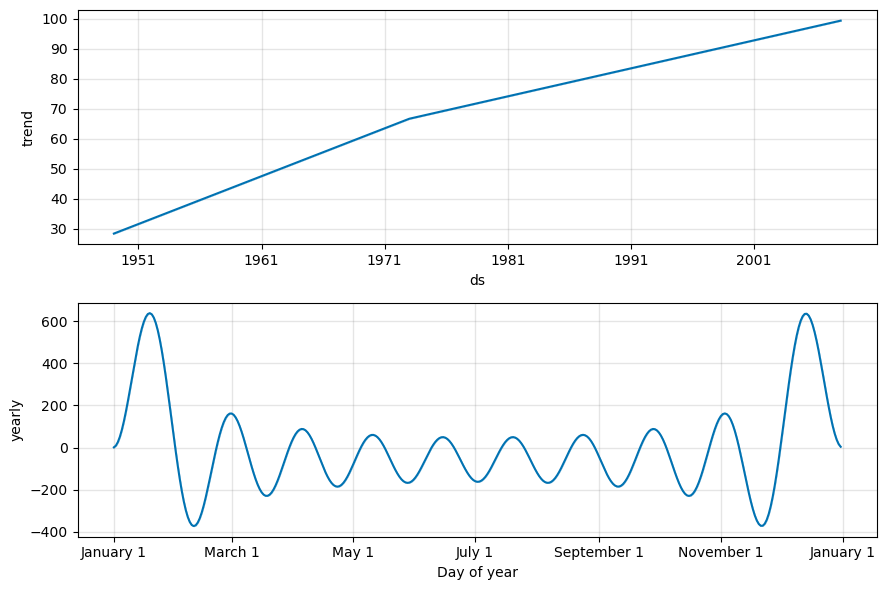

In [6]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data['y'], forecast['yhat'][-len(test_data):])
print(f"Mean Squared Error: {mse:.2f}")

# Plot the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

# Make predictions for the future
future_days = 30  # Predict for the next month
future_data = data.iloc[-future_days:].copy()
future_data['ds'] = pd.to_datetime(future_data['Year'], format='%Y')
future_forecast = model.predict(future_data)

print(f"Predicted energy consumption for the next {future_days} days:")
print(future_forecast['yhat'])

# Plot the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [7]:
# Make predictions for the future
future_days = 30  # Predict for the next month
future_data = data.iloc[-future_days:].copy()
future_data['ds'] = pd.to_datetime(future_data['Year'], format='%Y')
future_forecast = model.predict(future_data)

print(f"Predicted energy consumption for the next {future_days} days:")
print(future_forecast['yhat'])

Predicted energy consumption for the next 30 days:
0      86.941079
1      87.888495
2      89.408877
3      90.297122
4      90.671515
5      91.618931
6      93.139314
7      94.027559
8      94.401952
9      95.349368
10     96.869750
11     97.757995
12     98.132388
13     99.079804
14    100.600187
15    101.488432
16    101.862825
17    102.810241
18    104.330624
19    105.218869
20    105.593262
21    106.540678
22    108.061060
23    108.949305
24    109.323698
25    110.271114
26    111.791497
27    112.679742
28    113.054135
29    114.001551
Name: yhat, dtype: float64


In [8]:
#New model Using-> Long Short-Term Memory (LSTM) neural network model 

Epoch 1/100


C:\Users\umesh\Amita-DataBC\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.2579
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0514
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0334
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0688 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0473
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0188 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0102 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0171 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0216 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0185
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0112
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080 
Epoch 16/100
2/2 ━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 
Epoch 84/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 
Epoch 85/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 
Epoch 86/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 
Epoch 87/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 88/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 
Epoch 89/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 
Epoch 90/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 91/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 
Epoch 92/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 
Epoch 93/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 
Epoch 94/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 
Epoch 95/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 
Epoch 96/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 
Epoch 97/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 
Epoch 98/100
2/2 ━━━━━━

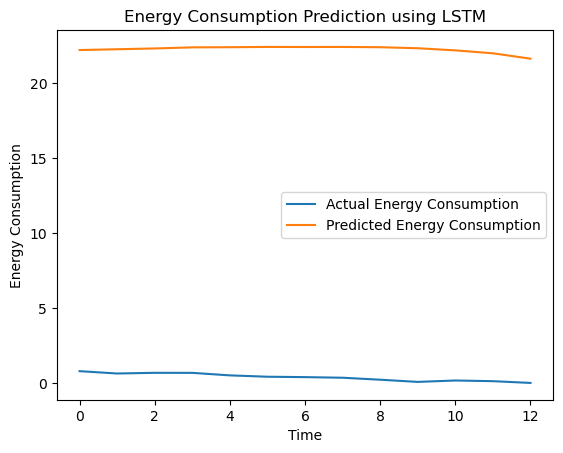

In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
dataset = pd.read_csv('../Data Source/combined_single_sealevel.csv')

# Convert 'Year' column to datetime format
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')

# Set 'Year' column as index
dataset.set_index('Year', inplace=True)

# Check for missing values and fill them if any
if dataset.isnull().sum().any():
    dataset.fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Function to create supervised learning dataset
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time steps for LSTM
time_steps = 12  # You can adjust this value as needed

# Create supervised learning dataset
X, y = create_dataset(scaled_data, time_step=time_steps)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], dataset.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], dataset.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], dataset.shape[1])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], dataset.shape[1] - 1)))))[:, 0]

# Plot the results
plt.plot(y_test, label='Actual Energy Consumption')
plt.plot(predictions, label='Predicted Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Prediction using LSTM')
plt.legend()
plt.savefig('../Random_forest_model_images/LSTM_Energy_Consumption_Prediction.png')
plt.show()


In [12]:
#test the LSTM model performance 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 438.5977172810131
Root Mean Squared Error (RMSE): 20.942724686177133
Mean Absolute Error (MAE): 20.941671978163182
R-squared (R2) Score: -7113.966351396872


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
data = pd.DataFrame({
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Total Renewable Energy Consumption': [6.587023, 6.799011, 6.829465, 7.119713, 7.38348, 7.534561, 7.593816, 7.30056, 7.644234, 8.090795, 8.244574],
    'Total Primary Energy Consumption': [94.253199, 95.334861, 94.484143, 94.092392, 93.901708, 97.404845, 96.603433, 88.852392, 93.362899, 94.790665, 93.685776]
})

# Split the data into features (X) and target variable (y)
X = data[['Year']]
y = data['Total Renewable Energy Consumption']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

# Reshape data for LSTM model
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Initialize and train the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_lstm, y_scaled, epochs=100, batch_size=1, verbose=1)

# Predict energy consumption for the next 10 years (2 years in this example)
future_years = np.array(range(2024, 2034)).reshape(-1, 1)
future_years_scaled = scaler.transform(future_years)
future_years_lstm = future_years_scaled.reshape((future_years_scaled.shape[0], 1, future_years_scaled.shape[1]))

predicted_energy_consumption_scaled = model.predict(future_years_lstm)
predicted_energy_consumption = scaler.inverse_transform(predicted_energy_consumption_scaled)

# Print the predicted energy consumption for the next 10 years
print("Predicted Energy Consumption for the Next 10 Years:")
for year, consumption in zip(range(2024, 2034), predicted_energy_consumption):
    print(f"Year {year}: {consumption[0]} units")


C:\Users\umesh\Amita-DataBC\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.2581
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3301 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2233 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2540 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1277 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1195 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1017 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1083 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1084 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1060 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0481 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0512 
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0762
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0554  
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110     
Epoch 82/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074  
Epoch 83/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070 
Epoch 84/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 
Epoch 85/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 
Epoch 86/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093     
Epoch 87/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156 
Epoch 88/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 
Epoch 89/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 
Epoch 90/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082     
Epoch 91/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 
Epoch 92/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 
Epoch 93/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 
Epoch 94/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072     
Epoch 95/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5

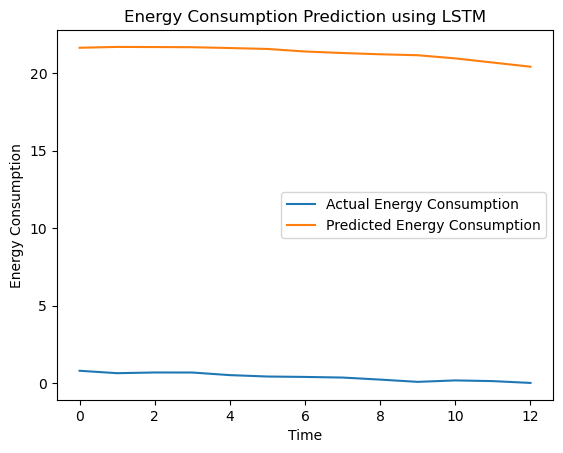

In [13]:
#plot the model performance
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual Energy Consumption')
plt.plot(predictions, label='Predicted Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Prediction using LSTM')
plt.legend()
plt.show()


In [ ]:
#new model -  time series forecasting model called Prophet

20:10:13 - cmdstanpy - INFO - Chain [1] start processing
20:10:14 - cmdstanpy - INFO - Chain [1] done processing


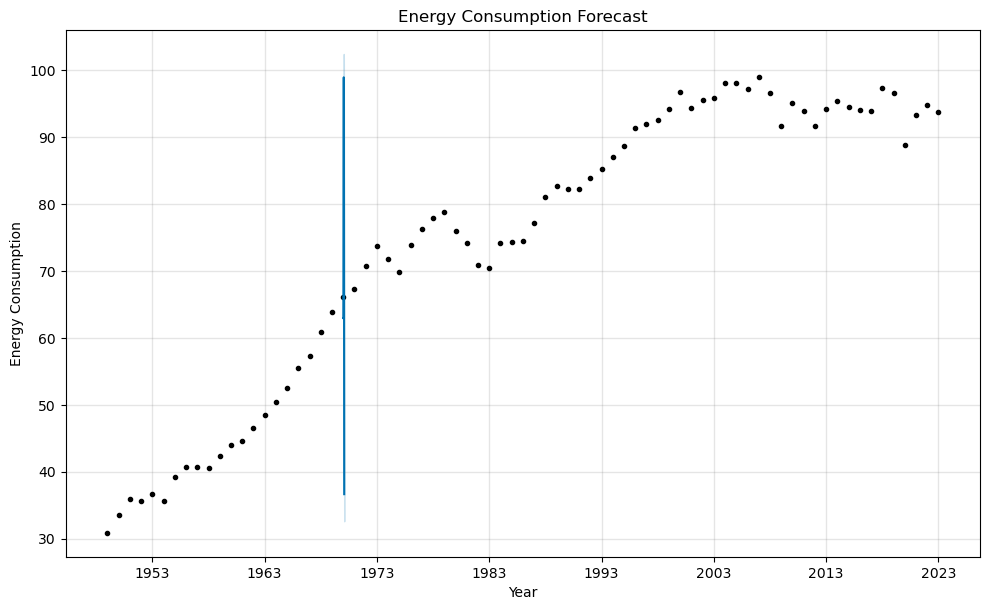

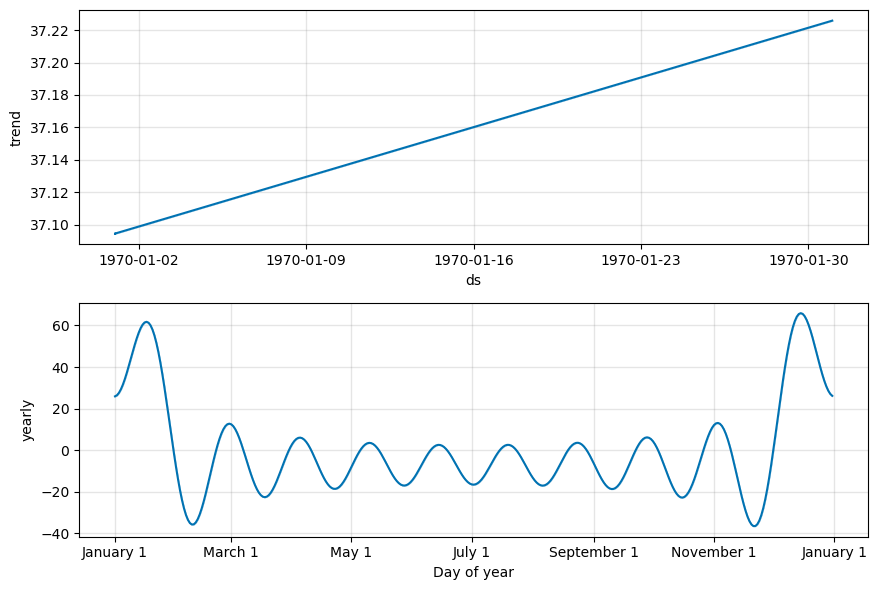

Predicted energy consumption for the next 30 days:
                               ds       yhat
75  1970-01-02 00:00:00.000002023  63.323902
76  1970-01-03 00:00:00.000002023  64.325777
77  1970-01-04 00:00:00.000002023  65.918293
78  1970-01-05 00:00:00.000002023  68.045590
79  1970-01-06 00:00:00.000002023  70.634255
80  1970-01-07 00:00:00.000002023  73.595411
81  1970-01-08 00:00:00.000002023  76.827237
82  1970-01-09 00:00:00.000002023  80.217862
83  1970-01-10 00:00:00.000002023  83.648525
84  1970-01-11 00:00:00.000002023  86.996941
85  1970-01-12 00:00:00.000002023  90.140764
86  1970-01-13 00:00:00.000002023  92.961050
87  1970-01-14 00:00:00.000002023  95.345642
88  1970-01-15 00:00:00.000002023  97.192350
89  1970-01-16 00:00:00.000002023  98.411877
90  1970-01-17 00:00:00.000002023  98.930382
91  1970-01-18 00:00:00.000002023  98.691617
92  1970-01-19 00:00:00.000002023  97.658591
93  1970-01-20 00:00:00.000002023  95.814701
94  1970-01-21 00:00:00.000002023  93.164299
95  

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("../Data Source/combined_single_sealevel.csv")

# Convert non-numeric values to NaN
data[['Precipitation Change', 'Temperature Change (Celcius)']] = data[['Precipitation Change', 'Temperature Change (Celcius)']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)

# Check if the column exists before renaming
column_to_rename = 'Total Primary Energy Consumption'
if column_to_rename not in data.columns:
    print(f"Error: Column {column_to_rename} not found in the dataset.")
else:
    # Rename the column for Prophet
    data.rename(columns={'Year': 'ds', 'Total Primary Energy Consumption': 'y'}, inplace=True)

    # Create a Prophet model
    model = Prophet()

    # Fit the model
    model.fit(data)

    # Make predictions for the future
    future_days = 30  # Predict for the next 30 days
    future = model.make_future_dataframe(periods=future_days, freq='D')

    # Forecast
    forecast = model.predict(future)

    # Plot the forecast
    model.plot(forecast)
    plt.xlabel('Year')
    plt.ylabel('Energy Consumption')
    plt.title('Energy Consumption Forecast')
    plt.savefig('../Random_forest_model_images/Prophet_energy_consumption_forecast.png')
    plt.show()

    # Plot components
    model.plot_components(forecast)
    plt.show()

    # Print the forecast for the next 30 days
    print(f"Predicted energy consumption for the next {future_days} days:")
    print(forecast[['ds', 'yhat']].tail(future_days))


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming y_true contains the actual values and y_pred contains the predicted values
y_true = test_data['y']  # Actual values
y_pred = forecast['yhat'][-len(test_data):]  # Predicted values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 20.82
Mean Squared Error (MSE): 766.41
Root Mean Squared Error (RMSE): 27.68


In [ ]:
#final new model-- linear regression to analyze the relationship between temperature change and total primary energy consumption.
##This will performs linear regression analysis to predict the total primary energy consumption based on the temperature change

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('../Data Source/combined_single_sealevel.csv')

# Select the relevant features for the hypothesis (temperature change and total primary energy consumption)
X = data[['Temperature Change (Celcius)']]
y = data['Total Primary Energy Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Mean Squared Error: 298.6190442051711
R-squared Score: 0.4545182308622687
Intercept: 65.7053745363229
Coefficient: [23.53066765]
